<a href="https://colab.research.google.com/github/chaegeon/Multi-learning/blob/main/%EA%B8%B0%EC%B4%88%ED%86%B5%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# 통계
- 교재로는 챕터2 부터
- 예제는 교재 맽 앞 책표지뒤의 아래쪽 소스코드
  - 예제는 직접 다운로드
- 기본적으로는 교재를 바탕으로 수업할 건데, 확률분포를 직접하더라고. 수업에서 그건 라이브러리를 사용해서 할 것

- 통계란?
  - 관찰(수집)된 잘(현상/상태)에 대해서 통계적(수치적)으로 처리하고 연구
  - 기술통계와 추론통계

## 기술통계
- 기초통계를 이용해서 자료의 성질(특성)을 확인(설명)하는 것
- 자료의 요약된 정보
  - 자료의 자세한 정보까지는 확인할 수 없습니다.
    - 자료의 세세한 정봏까지 확인이 가능하면, 통계없이 확인가능한 정도로 아주 자근 파일
    - 즉, 빅데이터에서 아주아주 큰 파일에 대해서 확인할 수 있는 방법은 통계외에는 접근하는 방법조차 없다.
    - 자료의 아주 세세한 정보는 통곙에 있어서는 큰 관심사가 되지 않는다
  - 자료의 커다란 특성을 확인할 수 있다.
  - 통계가 아니고서는 대용량의 자료를 설명할 방법이 없다.


- 분석에 사용하는 기술적인 통계적 수치(통계량)
  - 중심에 대한 통계 ( 교재 2.1)
  - 산포에 대한 통계 ( 교재 2.2)
  - 관계에 대한 통계 ( 교재 3.1)
  - 형태에 대한 통계


 자료에 대한 평균

### 중심에 대한 통계
- 자료의 중심에 대한 경향을 나타내는 수치
- 중심성에 관한
- 평균 : 자료에 대한 평균(모평균/표본평균/샘플평균)
- 중앙값 : 자료의 50%에 해당하는 값
  - 자료를 정렬 했을 때, 가운데 오는 값
- 최빈값 : 가장 많이 등장하는 값


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/기초통계/ch2_scores_em.csv')
df.head(2)

,student number,english,mathematics
0,1,42,65
1,2,69,80


In [ ]:
# 학생 10명의 영어점수
# 를 넘파이로 바꿔서 배열로 보
scores = np.array( df['english'][:10] )
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [ ]:
# 평균구하기
sum(scores) / len(scores)

55.0

In [ ]:
# 넘파이의 mean은 평균을 구함
np.mean( scores )

55.0

In [ ]:
# 판다스에서 평균
df['english'][:10].mean()

55.0

#### 중앙값 구하기

In [ ]:
np.sort( scores)
# 가운데 오는 56, 57이 중앙값이 된다?

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [ ]:
sort_scores = np.sort(scores)
sort_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [ ]:
len(sort_scores) // 2

5

In [ ]:
size = len(sort_scores)
if size % 2 == 0:
  m0 = sort_scores[size//2-1]
  m1 = sort_scores[size//2]
  mid = (m0 + m1) / 2
  # 사이즈?가 짝수라면 딱 가운데 수가 없는 거잖아.
  # 그럼 가운데 수를 두개를 m0, m1로 정해서 이 평균값을 중앙값으로 정함
  # Ex). 1, 2, 3, 4, 5라면 중앙값이 3일텐데
  # 1, 2, 3, 4, 5, 6 이라면 가운데의 두 수인 3, 4의 평균을 중앙값으로 삼음
else :
  mid = sort_scores[ (size+1) // 2-1 ]


In [ ]:
mid
# 56 과 57의 평균으로 56.5를 나온 듯

56.5

In [ ]:
np.median(scores)

56.5

In [ ]:
df['english'][:10].median()

56.5

#### 최빈값 구하기
- 넘파이에서는 최빈값을 구하는 함수가 없다.
- 시리즈는 있음




In [ ]:
# 시리즈 형태로 바꾸고 mode 로 값을 구하는 방법
pd.Series(scores). mode()


0    65
dtype: int64

In [ ]:
df['english'][:10].mode()

0    65
dtype: int64

### 산포에 대한 통계
- 자료의 변동성을 나타해는 수치
  - 자료들이 중심으로부터 얼마나 멀리 떨어져 있는가의 정도를 나타내는 수치
- 편차 : 관측(수집)된 값과 평균의 차이
  - 평균(중심)으로부터 얼마나 멀리 떨어져 있는가
- 변동 : 편차의 제곱합 (제곱해서 다 합친 값)
- 분산 : 변동을 데이터의 수로 나눈 값
- 표준편차 : 분산의 제곱근


#### 편차구하기

In [ ]:
mean = np. mean(scores) # 평균 
diviation = mean - scores  # 디비에이션은 ( 평균 - 값 )
diviation

array([ 13., -14.,  -1.,  14.,  -2.,   7., -10.,   6., -10.,  -3.])

In [ ]:
# 위의 편차를 제곱해서 합친 값이 변동

#### 변동 구하기

In [ ]:
variation = np.sum(diviation ** 2 ) # 제곱하는 경우는 부호를 없애거나
variation      # +13 이나 -14나 멀리 떨어진 건 같은데, 0이 나오면 차이가 없다는 뜻이 나와버리니까
              # 부호를 없애는 것

860.0

In [ ]:
# 넘파이가 분산을 구하는 방식
variation / len(scores)


86.0

In [ ]:
# 시리즈나 프레임이 분산을 구하는 방식?
variation / ( len(scores) - 1 ) # -1 을 자유로라고 해석하기도 하고..
# 표본과 모집단 사이의 차이를 줄이기 위한 방편
# 일반적으로 표본에서 말하는 분산은 -1 한 분산이라고 보면 될 듯

95.55555555555556

In [ ]:
np.var(scores)

86.0

In [ ]:
# 파라미터로 조절
np.var(scores, ddof = 1)

95.55555555555556

In [ ]:
df['english'][:10].var()

95.55555555555556

In [ ]:
# 이것도 파라미터로 조절 가능
df['english'][:10].var(ddof=0)

86.0

#### 표준편차 구하기
- 분산에 루트를 씌운 것

In [ ]:
np.std(scores)

9.273618495495704

In [ ]:
df['english'][:10].std()

9.775252199076787

판다스는 이러한 통계값을 한번에 계산할 수 있다.
- describe를 통해

In [ ]:
df['english'][:10].describe()
#개수, 평군, 표준편차, 최소최대 값 등등
# 근데 median. 최빈값은 없네

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
Name: english, dtype: float64

#### 표준화와 편차
- 일반적인 표준화는
  - 데이터에서 평균을 빼고, 표준편차러 나누는 작업
    - 자료들이 서로 다른 분포를 가지고 있다면, 비교작업이 어렵기 때문에
    - 단점은
      - 자료들이 정규분포임이 가정. 아니라면 최선이 아닐 수 있음
    - 장점은 평균이나 분산에 상관없이 표준화된 지표를 얻을 수 있다.
- 다른 방법은
  - 최소/최대로 스케일링 하는 방법
  - Robust 등

In [ ]:
z = (scores-mean) / np.std(scores)
z # 표준화된 데이터
#평균이 0이고, 편차는 +- 1이 된다.

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

평균은 0이고, 편차는 1이 된다.

In [ ]:
np.mean(z), np.std(z)

(-1.6653345369377347e-17, 0.9999999999999999)

편차값
- 편균이 50, 표준편차가 10이 되도록 정규화
- 편차값이 50이면 평균적인 결과
- 50보다 클 수록 상위 결과라는 의미로 해석

In [ ]:
z = 50 + 10 * (scores-mean) / np.std(scores)
z
# 첫번째는 평균보다 훨씬 낮구나
# 두번째는 평균보다 높은 점수를 냈구나
# 3번째는 거의 뭐 평균이구나
# 이런 식으로 해석 가능

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

### 관계에 대한 통계
- 자료와 자료같의 관게를 낱타내는 수치
  - 수치일 뿐, 실제 관계를 수치만 가지고 정확하게 표현할 수 없다.
  - 수치를 가지고 해석하는 것은 분석하는 사람의 몫
- 2변수

1. 상관관계
- 공분산(Co-variance)
- 두 변수 사이의 분산을 보는 것
  - 결과적으로 두 변수의 분산이 같이 커지거나, 작아지면 상관성이 있다라고 해석
  - 혹은 반대로, 분산이 커지는데 반대로 작아지거나, 분산이 작아지는데 반대로 커지거나 상관성이 있다고 해석

- 공분산의 해석은 다음과 같다
  - **cov > 0** : x가 큰값(혹은 작은값)을 가질 때, y도 큰값(혹은 작은값)을 가지는 경우
    - x의 분산이 커질 때, y의 분산 또한 커지는 경우
    - x의 분산이 작아질 때, y의 분산이 같이 작아지는 경우
    - 두 변수를 곱하면 양수가 나옴
    - 즉, x와 y사이에 양의 상관성이 있다고 해석
  - **cov < 0** : x와 y가 반대인 경우
    - x의 분산이 작아질 떄, y의 분산이 커지거나
    - x의 분산이 커질 때, y의 분산이 작아지거나
    - 한 쪽이 양수 일 때 다른 한쪽은 음수니까 곱하면 음수가 나옴
    - 이런 경우에는 x와 y의 사이에 음의 상관성이 있다로 해석
  - **cov = 0** 인 경우 (0에 가까울 경우)
    - x의 분산과 상관없이 y가 존재하는 경우(그 반대도 마찬가지)
    - 음수와 양수가 섞이기 때문에 0에 가까운 값을 가지게 된다.
    - 두 변수는 상관성이 적다라고 봄

- 단점
  - 두 변수 사이의 상관성이 낮아도, 수치가 크면 ,공분산 값이 크게 나올 수 있다.
  - 반대로 두 변수 사이의 상관서어ㅣ 높아도, 수치가 낮으면, 공분산 값은 작게 나올 가능성이 있다.
  - **상관계수** : 공분산의 값을 -1과 1 사이의 값으로 표준화한 값
    - -1 과 1에 가까울 수록 상관성이 높다고 해석
    - 0에 가까울 수록 상관성이 낮다고 해석


2. 인과관계
- 추론통계에서 확인하고자 하는 것이 인과성이 될 수 있다.
- 어떤 자료가 다른 자료의 원인이 되는 경우
  - 모든 변수가 무조건 원인이 될 수 있는 것은 아니다


In [ ]:
# 영어점수와 수학점수의 공분산을 계산
en_scores = np.array(df['english'][:10])
ma_scores = np.array(df['mathematics'][:10])

In [ ]:
cov = np.cov( en_scores, ma_scores, ddof =0 ) # 책 예제와 동일하게 하려면 ddof=0
cov

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [ ]:
np.corrcoef( en_scores, ma_scores)
# 상관이 있어보이네

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [ ]:
df[['english', 'mathematics']].corr()
# 상관이 있어보여

,english,mathematics
english,1.000000,0.723741
mathematics,0.723741,1.000000


두 변수의 상관성을 확인하기 좋은 시각화 'pair_plot'을 이용해 볼 수 있다
- pait_plot은 변수가 많아지면, 굉장히 느려지기 때문에, 주의해야한다.


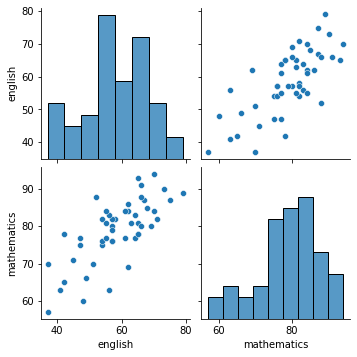

In [ ]:
sns.pairplot( df[['english', 'mathematics']] )

### 형태에 대한 통계
- 형태를 수치화한 것
- 자료의 분포나 왜곡된 형태
  - 왜도 : 편향. 중심을 기준으로 좌우의 데이터가 편향되어 있는 형태를 나타내는 수치
    - 왼쪽으로 차우쳐져 있다-> 꼬리가 오른쪽

  - 첨도 : 뾰족함의 정도
    - 뾰족한 게 높을 수록 자료가 중심으로 모여있는. ^


## 추론통계
- 표본을 통해서 모집단을 추론하는 과정
  - ( 모집단 : 우리가 알고자 하는 것 )
  
  1. population을 모집단이라고 보고
  2. 여기서 표본을 추출 - sample data
  3. 
  4. 추정

- 통계를 대하는 자세
  - 마크트웨인
    - 거짓말의 3가지 종류 : 거짓말 ,새빨간 거짓말, 통계
    - 통계가 모집단의 모든 특징을 전부 설명할 수는 없다.
  - 통계의 한계
    - 일단! 모집단의 특성을 표본을 통해서 통계로 설명한다는 것은 매우 괜찮은 생각이다
    - 표본의 특성이 꼭 모집단과 같을 거라는 보장이 없다.
      - 표본이 모집단을 대표하는 특성인자 아닌지, 알 수 있는 방법도 없다.
      - 누구도 알 수 없다.
    - 표본을 통해서 모집단의 평균을 알 수 없지만, 추론(추측, 추정)은 가능하다
      - 추측이니까.. 99%의 확률로 맞을 수도 있지만 , 1%의 확률로 틀릴 가능성 또한 반드시 존재
  - 모집단을 알 수 없다.
    - 모집단은 시간이 지나면서 변하기 때문에

    - 일반적으로 ML/DL에서 하려는 건 과거의 데이터를 이용해서 현재나, 미래를 설명하고 싶은건데(이게 말이 되는가?)

- 이후에 수업시간에 얘기하는 확률과 통계는 모집단을 가정하고 진행


- 하지만 우리는 통계를 사용하지 않을 수는 없다.
  - 통계가 아니고서는 대규모의 데이터를 해석할 수도, 설명할 수도 없다.
  - 자료간의 다소의 차이는 있겠지만, 공통적인 특징은 확인할 수 있다.




## 모집단과 표본


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/기초통계/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

복원 추출과 비복원 추출

In [ ]:
np.random.choice(scores, 20)
# 중복가능 - 복원추출

array([81, 76, 77, 76, 67, 54, 69, 79, 74, 87, 52, 59, 46, 41, 80, 47, 72,
       45, 96, 28])

In [ ]:
np.random.choice(scores, 20, replace=False)
# 중복되지 않는 - 비복원 추출

array([76, 82, 79, 86, 67, 71, 97, 52, 63, 99, 74, 58, 63, 74, 85, 29, 76,
       54, 52, 76])

In [ ]:
for i in range(5):
  sample = np.random.choice(scores, 20)
  print('{}번째 무작위 추출 얻은 표본 평균: {}'. format( i+1, sample.mean()))

1번째 무작위 추출 얻은 표본 평균: 67.4
2번째 무작위 추출 얻은 표본 평균: 66.85
3번째 무작위 추출 얻은 표본 평균: 68.4
4번째 무작위 추출 얻은 표본 평균: 69.65
5번째 무작위 추출 얻은 표본 평균: 73.35


In [ ]:
# 실제 모집단의 평균
scores.mean()

69.53

# 확률
- 미래에 발생할 사건에 대한 믿음에 대한 측정값
  - 내일 비가 올 확률이 70%다
- 물리, 화학, 사회 과학 등에서 발생하는 관심 현상의 측정값을 불확실성에 의해 예측할 수 없는 경우에 사용
  - 동전을 던졌을 때(앞,뒤|1/2)
  - 동전을 던졌을 때 앞이 나오면 앞으로 한칸 이동 뒷면이 나오면 뒤로 한칸 이동
  - 동전을 던지는 시행을 여러번(무한히)했을 경우, 결국 원점으로 돌아와야 한다. 
- 이런 상환을 랜덤이라고 하며, 랜덤이라고 해도, 이 사건에 대한 상대 빈도 정보가 이미 있다면 예측도 가능

## 빈도론적 확률
- 우리한테 일반적으로 잘 알려져 있는 확률(고전 확률)
- 어떤 사건을 반복해서 관찰(수집)했을 때, 발생하는 상대 빈도수를 확률로 정의
- 어떤 사건이 무한히 반복된다고 가정 했을 때, 이 사건이 발생할 확률을 상대빈도로 정의
  - 시행을 한 번도 안했거나, 한 번뿐인 사건은 정의가 되지 않는다.
  - 현실적으로, 무한히 시행을 하는 것은 불가능하기 때문에, 실제 확률값을 알 수 없는 경우가 더 많다.

- 수집된 자료들의 변수들도, 확률적으로 주어지는 값으로 해석
  - 꼭, 주사위를 던지거나 동전을 던져서 관찰된 값만 확률적인 값으로 보지 않습니다. 
  - 수집된 자료의 변수 x들도 전부 확률적으로 주어진 값으로 해석 
  - 변수 x들을 `확률변수`라고 부릅니다. 

- 동전 던지기의 역사
  - 앞면이 나왔을 때를 성공이라고 가정
  - 1707-1788(Count Buffon): 4040번 동전 던지기 실험 앞(2048회) = 0.5069
  - 1900(Karl Pearson): 24,000번 동전 던지기 앞(12,012) = 0.5005
  - John Kerrich: 10,000번 던지기 앞(5067) = 0.5067

## Laplace 확률
- 고전적 확률에 대한 정의
- 표본공간의 각 원소들이 일어날 가능성이 같다고 가정하여 확률을 정의
- 주사위를 던져서 짝수가 나올 확률은 3/6 = 2/1로 정의
  - 표본공간의 원소의 개수는 6개이고, 짝수 사건의 원소는 3개 이므로, 짝수가 발생한 확률은 0.이다. 
  - 각 원소(주사위 눈금)가 모두 동일한 확률(1/6)에 의해서 나타남을 가정
- 일반적으로 표본공간의 개수가 유한하고, 원소 모두를 알고 있을 때, 사용할 수 있다. 

## 확률의 공리
- 확률의 단순한 정의
- 확률은 항상 0보다 크거나 같고, 1보다 작거나 같다. 

$$
  0 \le \mathbb{P} \le 1
$$

- 전체사건을 S에 대해서, 각각의 사건들이 상호배반적($A \cap B = \phi$) 이라면, 각 사건들이 발생하는 확률은 각 확률을 더한것과 같다. 

$$
  \mathbb{P}(S) = 1
$$

- 주사위를 던졌을 때, 1 또는 2가 나올 확률은 1이 나올 확률과 2가 나올 확률을 더한것과 같다. 

$$
  \begin{align}
    \mathbb{P}(S) & = 1/6 + 1/6 + 1/6 + 1/6 + 1/6 + 1/6 = 1 \\ 
    \mathbb{P}(1) + \mathbb{P}(2) & = 1/6 + 1/6
  \end{align}
$$

## 확률분포
- 교재 p.98 4.2

In [ ]:
dice = [ 1, 2, 3, 4, 5, 6 ]
prob = [ 1/21, 2/21, 3/21, 4/21, 5/21, 6/21 ]

In [ ]:
num_trial = 100
sample = np.random.choice( dice, num_trial, p=prob)
sample

array([4, 5, 6, 6, 6, 6, 4, 3, 6, 2, 2, 1, 4, 3, 6, 5, 6, 3, 5, 5, 2, 5,
       6, 3, 6, 6, 3, 5, 4, 6, 6, 4, 5, 2, 4, 2, 6, 5, 3, 3, 4, 5, 6, 4,
       3, 1, 3, 3, 2, 6, 3, 6, 6, 2, 4, 6, 3, 6, 6, 2, 1, 6, 4, 4, 4, 6,
       4, 6, 1, 6, 5, 6, 4, 6, 4, 5, 2, 5, 4, 6, 4, 6, 3, 3, 1, 4, 6, 6,
       3, 3, 6, 6, 6, 2, 1, 1, 1, 5, 4, 2])

In [ ]:
freq, _ = np.histogram(sample, bins=6, range=(1,7))
pd.DataFrame( {'빈도수':freq, '상대 빈도수':freq/num_trial}, index=pd.Index(np.arange(1,7), name='dice'))


,빈도수,상대 빈도수
dice,,
1,8,0.08
2,11,0.11
3,16,0.16
4,19,0.19
5,13,0.13
6,33,0.33


파이썬에서 _ 가 붙는 경우
- 변수에 자리하는 경우
  - 암묵적인 의미
  - 사용하지 않는 변수


### 대수의 법칙 ( 큰 수의 법칙)
- 시행횟수가 많아질 수록 모집단의 분포를 따라갈 것이다.
- 아래는 책의 내용

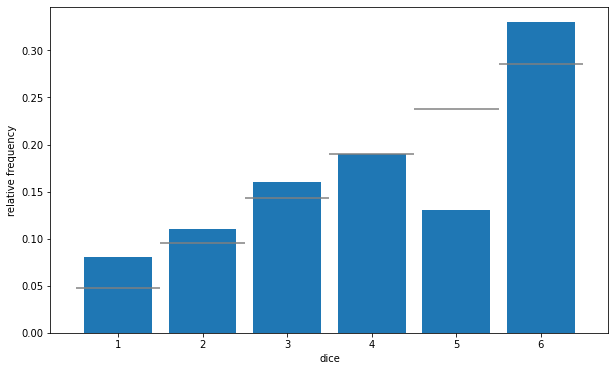

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')

# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))

# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

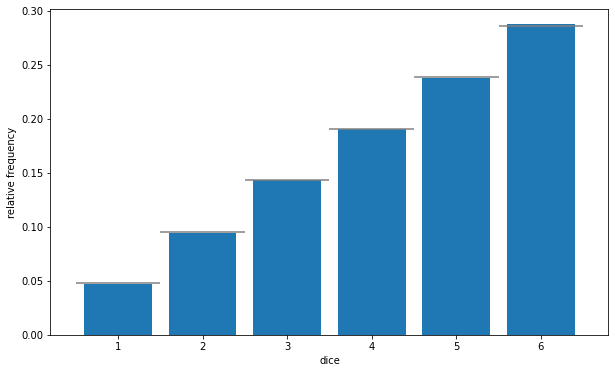

In [ ]:
num_trial = 100000   #100번할 때랑 1000번할 때도 다름
sample = np.random.choice( dice, num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

### 추론통계에서의 확률
- 교재 p.106 4.3

In [ ]:
scores

array([ 76,  55,  80,  80,  74,  61,  81,  76,  23,  80,  41,  80,  68,
        88,  69,  57,  68,  86,  70,  68,  81,  73,  70,  90,  93,  79,
        66,  92,  88,  81,  52,  72,  59,  68,  74,  72,  63,  89,  45,
        81,  42,  76,  57,  83,  71,  74,  55,  60,  73,  79, 100,  73,
        85,  47,  50,  65,  52,  92,  64,  91,  92,  71,  78,  69,  78,
        77,  68,  78,  96,  81,  75,  72,  55,  55,  75,  49,  59,  89,
        99,  45,  94,  67,  70,  68,  86,  46,  77,  56,  79,  93,  70,
        76,  76,  58,  93,  96,  81,  71,  63,  61,  96,  91,  69,  46,
        28,  54,  68,  91,  60,  78,  90,  72,  68,  50,  52,  76,  67,
        72,  69,  80,  58,  65,  98,  58,  66,  61,  77,  85,  63,  64,
        66,  78,  59,  64,  34,  49,  68,  83,  74,  54,  49,  73,  45,
        86,  71,  46,  56,  59,  58,  48,  57,  60,  59,  87,  72,  55,
        65,  57,  65,  83,  74, 100,  76,  56,  82,  86,  86,  54,  68,
        87,  45,  63,  49,  56,  55,  89,  66,  57,  54,  72,  7

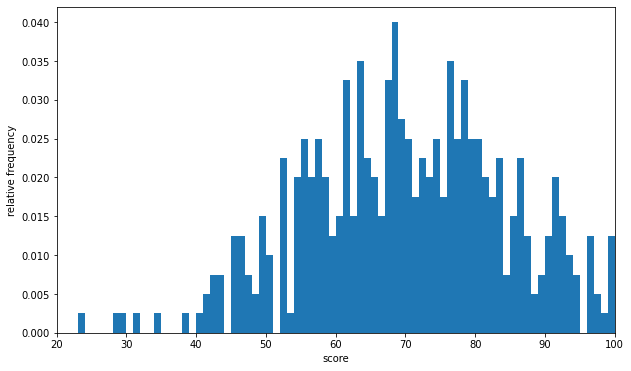

In [ ]:
# 책
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

표본추출을 통한 확률분포

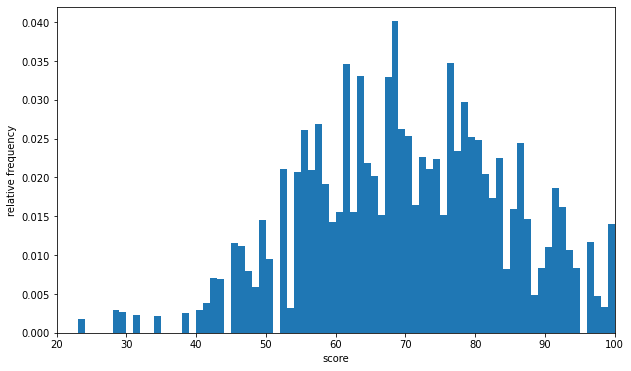

In [ ]:
sample = np.random.choice(scores, 10000)
#스코어에서 10000개 를 랜덤으로 뽑아서 샘플로 삼음
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

#이번엔 스코어가 아니라 샘플로
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

# 위의 모집단과 비슷하게 나온다
# 모집단에서 표본을 추출해도 모집단과 비슷하게 나온다.

과연 표본들의 평균은 모평균을 잘 설명할 수 있을까?
- (책)주어진 점수에서 20개의 표본을 골라서 평균을 내어 표본평균을 계산
  - 이걸 10000번 수행했을 때의 표본평균의 분포는?
  


In [ ]:
sample_means = []
#책에서는 리스트컴프레이션????을 이용했는데 강사님은 좀 더 쉽게
for _ in range(10000):
  sample_means.append(np.random.choice(scores, 20).mean())
  # 주어진 표본의 평균을 20번 추출한 뒤 그걸 10000번 수행

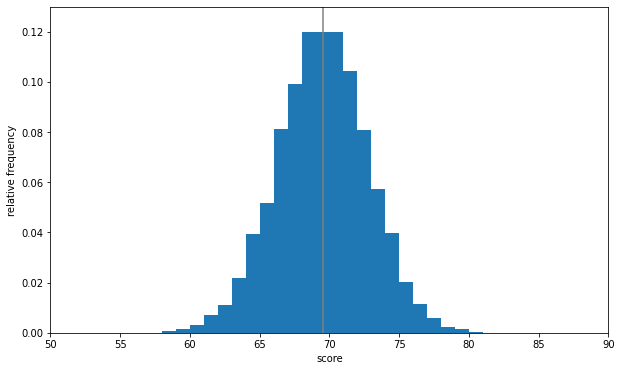

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)
# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()
# 가운데 회색선이 모평균
# 표본들의 평균은 모평균을 중심으로 분포

## 확률 변수와 확률분포
- 수업에서는 잘 알려진 확룰 분포들에 대해서만 확인
- 교재 챕터6, 챕터8

### 확률변수
- 확률적인 과정에 따라서 값이 결정되는 변수/함수를 **확률변수**라고 한다
  - 수집된 자료의 변수(Feature) x들도 어떤 확률적인 과정에 따라서 주어지는 값으로 해석

### 확률분포
- 확률변수가 특정한 값을 가지게 될 확률을 나타내는 함수를 **확률분포**라고 한다.
- 현실 게계의 자료는 확률분포를 알 수 없는 경우가 더 많기 떄문에, 일반적으로 잘 알려진 확률분포를 가정
- 변수의 형태 (양적변수-이산형/연속형) 에 따라서 달라짐

##### 이산확률 변수
- 확률변수가 이산적인 값을 가질 때, 이 변수를 **이산확률변수**라고 한다.
  - 셀 수 있는 값이거나, 범주형 자료들이 해당
  - 대표적인 분포는 '베르누이 분포', '이항분포' 등이 있다
- 이 떄의 확률분포를 확률변수 x의 '확률질량함수' 라고 한다.
- 일반적으로 확률분포를 알 수 있으면 확률질량함수를 알 수 있고,
- 반대로 확률질량함수를 알고 있으면 확률분포를 알 수 있다.


##### 이산확률분포
- 베르누이 분포
  - 가능한 사건의 경우가 딱 2가지로 구분되는 모든 시행을 '베르누이 시행'이라고 한다.
    - Ex). 성공/실패로 구분되는 경우가 대표적
    - 동전던지기 앞/뒤
    - 복권 당첨 여부
    - 주사위를 던졌을 때 특정 눈금이 나오는 경우(성공), 나머지가 나오는 경우(실패)
  - 베르누이 시행은 0(실패), 1(성공)으로 구분해서 간단하게 나타나게 된다.


In [ ]:
from scipy.stats import bernoulli, binom, poisson

주사위를 던졌을 때, 특정 눈금이 나오는 경우를 성공이라고 가정
  - 1이 나오는 경우를 성공이라고 가정
  - 성공확률이 1/6인 베르누이 분포를 따른다고 할 수 있습니다. 
  - 표본의 자료가 베르누이 분포를 따른다면, 모집단에서의 성공확률을 알고 싶은거죠

In [ ]:
rv = bernoulli(1/6)

파이썬에서는 생성된 개체의 pmf 메소드를 통해서 확률질량함수를 계산할 수 있다

In [ ]:
x = [0, 1]
rv.pmf(x)
# 저 두 개를 합치면 1이 됨

array([0.83333333, 0.16666667])

#### 모집단에서의 확률분포

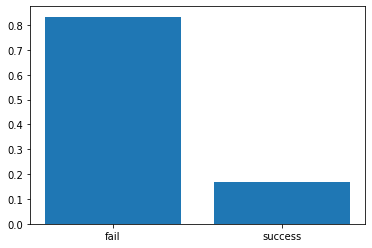

In [ ]:
plt.bar(x, rv.pmf(x) )
plt.xticks( [0,1], ['fail', 'success'] )
plt.show()

표본추출
- 파이썬에서는 각 객체들마다 난수를 생성하는 함수들을 지원
  - 주사위를 100번 던져서 1(성공이라 가정)이 몇번 정도 나오는지
  - 성공확률이 1/6인 베르누이 분포에서 표본을 추출하는 것과 동일하다
  - 과연 100번 수행한 결과가 베르누이 분포를 따를것인가?

In [ ]:
count = 100
x = rv.rvs(count) # 파이썬에서는 rvx를 통해서 샘플 추출
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

<function matplotlib.pyplot.show>

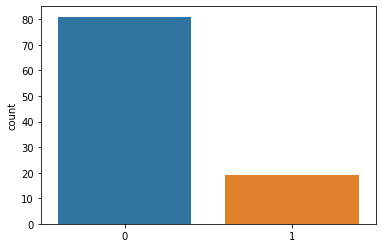

In [ ]:
sns.countplot(x)
plt.show

In [ ]:
np.bincount(x) / count

array([0.81, 0.19])

결국, 시행이 무한히 많아진다면 모집단의 분포에 근사하게 될 것

<function matplotlib.pyplot.show>

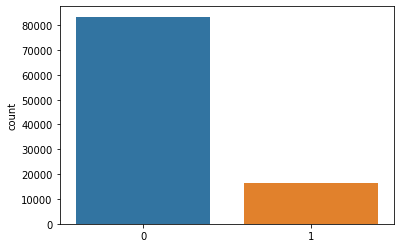

In [ ]:
count = 100000
x = rv.rvs(count)

sns.countplot(x)
plt.show

In [ ]:
np.bincount(x) / count

array([0.83417, 0.16583])

##### 이항분포(binom distribution)
- 베르누이 시행을 여러번 했을 경우의 분포
- 주사위를 10번 던졌을 때 1이 나오는 경우를 성공이라고 가정

In [ ]:
# 이항분포는 시행횟수가 1이면 베르누이 분포와 같다.
binom(1, 1/6).pmf([0,1])


array([0.83333333, 0.16666667])

In [ ]:
rv = binom(10, 1/6)

In [ ]:
x=np.arange(11)
rv.pmf(x)

array([1.61505583e-01, 3.23011166e-01, 2.90710049e-01, 1.55045360e-01,
       5.42658759e-02, 1.30238102e-02, 2.17063503e-03, 2.48072575e-04,
       1.86054431e-05, 8.26908584e-07, 1.65381717e-08])

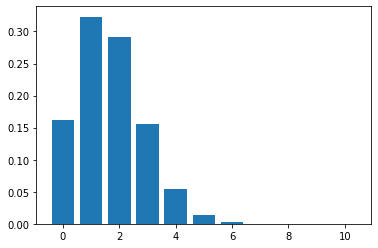

In [ ]:
plt.bar( x, rv.pmf(x) )
plt.show()

##### 표본추출


In [ ]:
x=rv.rvs(1000000)

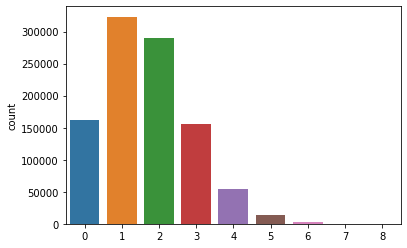

In [ ]:
sns.countplot(x)
plt.show()

##### 누적분포함수
- 주어진 확률 변수가 특정값보다 크거나 작아질 확률을 구할 때
 - 누적분포함수는 확률의 공리상 항상 0과 1사아의 값을 가진다.
 - 주사위를 10번 던졌을 때, 1이 3번 이하 나오게 될 확률은?

In [ ]:
x = np.arange(11)
rv.cdf(x) # 파이썬에서는 cdf로 구할 수 있음

array([0.16150558, 0.48451675, 0.7752268 , 0.93027216, 0.98453803,
       0.99756184, 0.99973248, 0.99998055, 0.99999916, 0.99999998,
       1.        ])

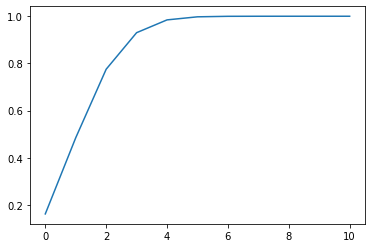

In [ ]:
plt.plot(x, rv.cdf(x) )
plt.show()

In [ ]:
prob = rv. cdf(x)
prob[3]
# 1이 세번 이하 나올 확률

0.9302721574455114

##### 포아송 분포
- 시간이나 면적 등을 구간으로 나눠서 표현
- 각구간별 사건은 독립적이고( 다른 사건에 영향을 주지 않음), 사건의 발생확률은 동일하다.(베르누이와 동일)
- 각 구간의 사건 발생 확률은 구간의 크기에 비례
- 정해진 시간 안에 어떤 사건이 일어날 횟수에 대한 값을 람다라고 한다면,
  - 사건이 k회 일어날 확률


- 책에서 든 예시
- 하루평균 2건의 교통사고가 발생하는 지역에서, 하루 교통사고 발생 건수

In [ ]:
rv = poisson(2)
# 하루 교통사고 발생건수의 평균은 2

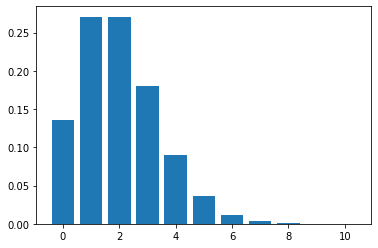

In [ ]:
x=np.arange(11)
plt.bar(x, rv.pmf(x) )
plt.show()
# 하루 동안 발생하는 교통사고 건수

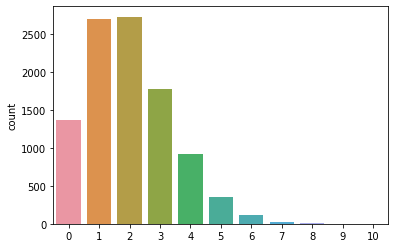

In [ ]:
x = rv.rvs(10000)
sns.countplot(x)
plt.show()

In [ ]:
x.mean()
# 표본의 평균도 모집단 평균에 근사

1.9898

##### 연속 확률 변수
- 확률 변수가 연속적인 값을 가지는 경우를 **연속활률변수** 라고 한다.
  - 이때의 확률분호를 확률변수의 확률밀도함수 하고 한다.
  - 수업시간에는 가장 대ㅛ적인 정규분포를 보자

###### 정규분포
- 통계학자들이 가장 사랑하는 분포
- 수학자 가우스에 의해서 처음 알려졌고, 가우스분포로도 잘 알려져 있다.
- 선형회귀 모형에서는 자료의 분포, 오차항의 분포를 정규분포로 가정을 한다.
- 평균이 0이고, 표준편차가 1인 정규분포를 **표준정규분포**라고 한다.

In [ ]:
# loc가 평균, scale이 표준편차를 뜻함
from scipy.stats import norm

In [ ]:
rv = norm( loc=0, scale=1 )

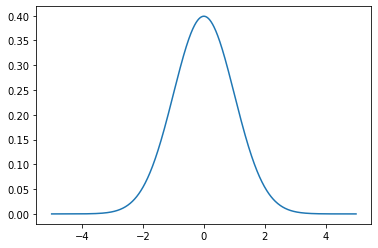

In [ ]:
x = np.linspace(-5, 5, 1000)
plt.plot(x, rv.pdf(x) )
plt.show()

정규분포의 누적분포함수
- 정규분포의 누적분포함수는 구할 수 없음이 알려져 있는데 
  - 파이썬은 근사한 결과를 돌려줍니다. 

- 일반화선형모형에서 logit함수나 딥러닝에서 활성화 함수 등이 정규분포의 누적분포함수를 사용을 하게 됩니다. 

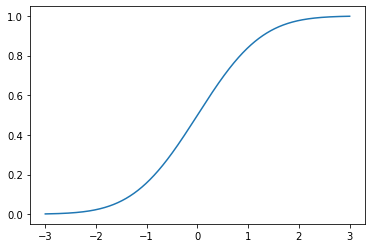

In [ ]:
x = np.linspace(-3, 3, 1000)
plt.plot(x, rv.cdf(x) )
plt.show()

# 중심극한의 정리
- 물론 증명도 되어 있고, 통계적 모형을 세울때, 정규분포를 사용할 수 있는 중요한 이론
  - 너무 맹신하거나, 오해 하는 경우가 많아요
- 모집단의 분포가 무엇이든 상관이 없이 
  - 어떤 분포를 갖든 동일하기만 하면 상관이 없습니다. 
  - 표본들의 평균은 결국 정규분포로 수렴하게 된다.
    - 단, 표본의 크기가 충분하다면
  - **중요한 것은, 자료의 분포가 정규분포임을 증명하지 않는다.**

- 표본이 얼마나 커야 충분히 크다고 얘기할 수 있는가?
- 표본의 크기가 정말 충분히 크다면, 그 평균들은 정말 정규분포가 되는가?
- 수업시간에는 균등분포를 가정
  - 각 구간마다 동일한 분포를 갖는 형태

In [ ]:
from scipy.stats import uniform

In [ ]:
n=20
m=100000
mean = []

rv = uniform(n)
for _ in range(m):
  x = rv.rvs(n)
  mean.append(x.mean() )

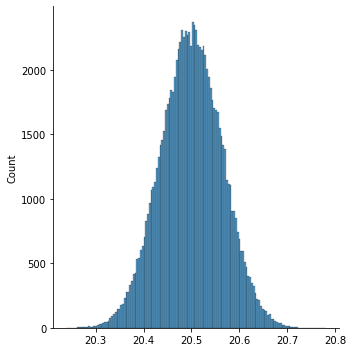

In [ ]:
sns.displot(mean)

# 몬테카를로 시뮬레이션
- 시뮬레이션 기법
- 난수를 이용해서 시행하는 모의 실험

## 도박사의 몰락
- 도박사는 과연 얼마만에 파산을 할 것인가?
- 이런 경우에는 확률분포를 가정하기 어렵다.
- 이런경우에 시뮬레이션을 통해서 표본을 추출하고, 이를 통해서 모집단의 모수를 추정
  - 모수 : 평균, 분산


## 카지노의 승률
- 카지노마다 승률이 다르게 설정 되어있고
- 게임마다 승률이 전부 다름
- 일반적으로 승리확률이 49%를 넘지 않음
  - 성공확률이 49%인 베르누이 분포를 생각해볼 수 있다.
  

In [ ]:
# 초기 자금이 10000원
# 49%의 확률로 100원을 따거나
# 51%의 확률로 100원을 잃는 베르누이 분포를 가정
# 도박사는 과연 얼마만에 파산할 것인가?(파산하지 않는 경우는 고려하지 않음)
n = 10000
p = 0.49
r = []
x = [-100, 100]

while True:
  i = bernoulli(p).rvs(1)[0]
  n += x[i]
  r.append(n)
  if n < 0 : break

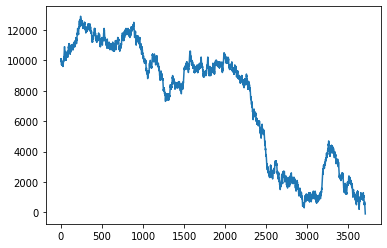

In [ ]:
plt.plot(r)
plt.show()

이 때, 도박사가 파산할 때까지의 게임의 횟수를 m이라고 한다면,
- 이 때 m이 확률 변수가 된다.
- 평균적으로 몇 회만에 파산하는지를 확인하고 싶다면
- 충분히 시뮬레이션을 해보고 그 결과를 확인
  - 수업시간에는 많이는 못 해보고 1000회만 해보자
  - 1000회의 몬테카를로 시뮬레이션을 진행

In [ ]:
p = 0.49
m = []
x = [-100, 100]
for _ in range(1000):
  n = 10000
  cnt = 0
  while True:
    cnt += 1
    i = bernoulli(p).rvs(1)[0]
    n += x[i]
    if n < 0 : break
  m.append(cnt)

도박사가 파산하기 까지의 게임횟수에 대한 분포

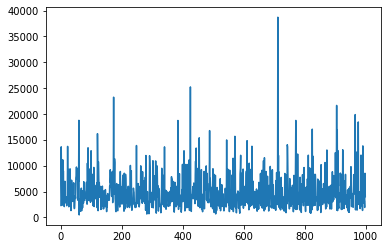

In [ ]:
plt.plot(m)
plt.show()

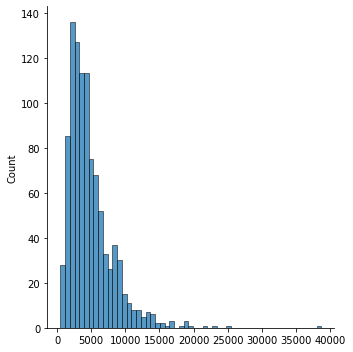

In [ ]:
sns.displot(m)
plt.show()

확률분호에서 평균과 분산을 확인

In [ ]:
print( np.mean(m) ) # 횟수의 평균
print( np.var(m) ) # 분신
print( np. std(m) ) # 표준편차

4852.654
11572935.284284001
3401.901715847182
